In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: Quoc Trung Ho <qho@sissa.it>
"""

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bubble_gw.utils import sample

sns.set_theme(style="ticks", font="Dejavu Sans")
sns.set_palette("bright")
# set default font for both text and mathtext
mpl.rcParams["mathtext.default"] = "regular"
mpl.rcParams["mathtext.fontset"] = "cm"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "STIXGeneral"
# mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update(
    {
        "axes.linewidth": 1,
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{bm} \usepackage{xcolor}",
        # Enforce default LaTeX font.
        "font.family": "serif",
        "font.serif": ["Computer Modern"],
        "font.weight": "bold",
        "figure.facecolor": "white",
        "animation.html": "jshtml",
    }
)

# do not show figures on screen
plt.ioff()
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath}")

In [19]:
start = 1.0
stop = 100.0
n_sample = 3
n_grid = 2
cmap = plt.get_cmap("Set1")

fig, ax = plt.subplots(figsize=(10, 6))
for n_iter in range(4):
    arr = sample(
        start, stop, n_sample=n_sample, n_grid=n_grid, n_iter=n_iter, sample_type="log"
    )
    color = cmap(n_iter)
    y_pos = np.full(len(arr), n_iter)
    ax.scatter(arr, y_pos, color=color, s=80, zorder=5, edgecolor="k", linewidth=0.8)
    y_pos = np.full(len(arr), -1)
    ax.scatter(arr, y_pos, color=color, s=80, zorder=5, edgecolor="k", linewidth=0.8)
    for x in arr:
        ax.vlines(
            x,
            ymin=-1,
            ymax=n_iter,
            colors=color,
            linestyles="dashed",
            linewidth=1.5,
            alpha=0.7,
            zorder=4,
        )
# Labels & styling
ax.set_xlabel("Parameter value", fontsize=16)
ax.set_ylabel(r"$n_\text{iter}$", fontsize=16)
ax.set_yticks([-1, 0, 1, 2, 3])
ax.set_yticklabels(["", "0", "1", "2", "3"])
ax.set_title(
    rf"Sample with log distribution, $\text{{start}}={start}, \text{{stop}}={stop}, n_\text{{sample}}={n_sample}, n_\text{{grid}}={n_grid}$"
)
ax.set_xscale("log")
ax.grid(axis="y", alpha=0.7)
fig.savefig("./figures/sample_log.png", bbox_inches="tight", facecolor="white")

fig, ax = plt.subplots(figsize=(10, 6))
for n_iter in range(4):
    arr = sample(
        start=start,
        stop=stop,
        n_sample=n_sample,
        n_grid=n_grid,
        n_iter=n_iter,
        sample_type="uniform",
    )
    color = cmap(n_iter)
    y_pos = np.full(len(arr), n_iter)
    ax.scatter(arr, y_pos, color=color, s=80, zorder=5, edgecolor="k", linewidth=0.8)
    y_pos = np.full(len(arr), -1)
    ax.scatter(arr, y_pos, color=color, s=80, zorder=5, edgecolor="k", linewidth=0.8)
    for x in arr:
        ax.vlines(
            x,
            ymin=-1,
            ymax=n_iter,
            colors=color,
            linestyles="dashed",
            linewidth=1.5,
            alpha=0.7,
            zorder=4,
        )
# Labels & styling
ax.set_xlabel("Parameter value", fontsize=16)
ax.set_ylabel(r"$n_\text{iter}$", fontsize=16)
ax.set_yticks([-1, 0, 1, 2, 3])
ax.set_yticklabels(["", "0", "1", "2", "3"])
ax.set_title(
    rf"Sample with uniform distribution, $\text{{start}}={start}, \text{{stop}}={stop}, n_\text{{sample}}={n_sample}, n_\text{{grid}}={n_grid}$"
)
ax.grid(axis="y", alpha=0.7)
fig.savefig("./figures/sample_uniform.png", bbox_inches="tight", facecolor="white")

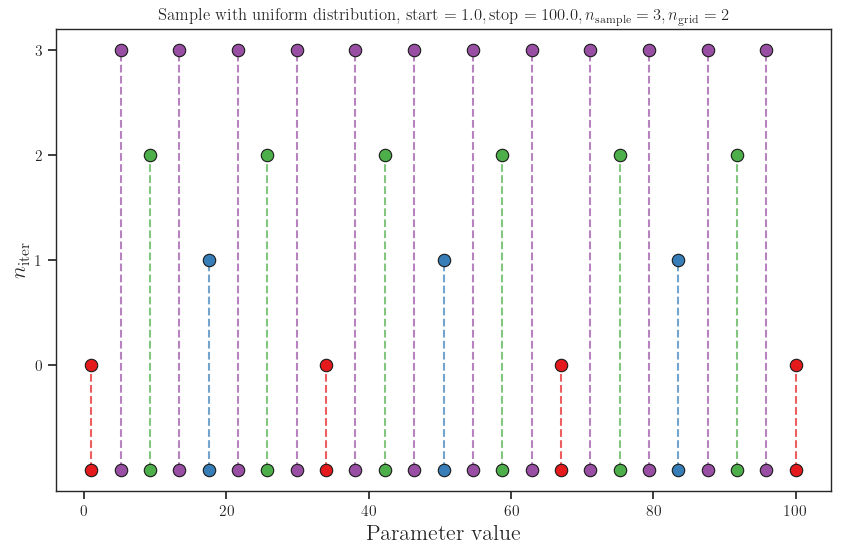

In [10]:
fig